In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# A visual history of Nobel prize winners

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/nobel.csv'
nobel = pd.read_csv(url)

In [3]:
nobel.columns=nobel.columns.str.replace(' ','_')

Display the first 10 rows.

In [4]:
nobel.head(10)

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,Birth_Country,Sex,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


## Part 1: who gets the Nobel Prize?

There are 969 prizes

Count the number of rows (prizes) 

In [5]:
nobel.Laureate_ID.count()

969

Count the number of prizes, grouped by `sex`.

In [6]:
nobel.groupby('Sex').Laureate_ID.count()

Sex
Female     50
Male      893
Name: Laureate_ID, dtype: int64

Count the number of prizes, grouped by `Birth Country`. Arrange the result by no. prizes in descending order and display the first 20 rows.

In [7]:
nobel_country=nobel.groupby('Birth_Country').Laureate_ID.count().sort_values(ascending=False)

In [8]:
nobel_country.head(20)

Birth_Country
United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Switzerland                  17
Austria                      15
Norway                       13
China                        12
Australia                    11
Denmark                      11
Germany (Poland)             10
Scotland                      9
Belgium                       9
South Africa                  9
Name: Laureate_ID, dtype: int64

## Part 2: USA dominance

Add a `usa_born_winner` column to the `nobel` DataFrame, where the value is `TRUE` when `Birth Country` is "United States of America".

In [9]:
nobel['usa_born_winner']= nobel.Birth_Country== "United States of America"

In [10]:
nobel['usa_born_winner'].sum()

276

Add a `decade` column to the `nobel` DataFrame showing the decade the prize was awarded (1953 should become 1950, for example).

In [11]:
# Hint: you can use numpy floor function to compute decade
nobel['decade']=np.floor(nobel.Year/10)*10

In [12]:
nobel.decade.value_counts().sort_values(ascending=False)

2000.0    140
1970.0    107
1990.0    107
1980.0     99
2010.0     98
1960.0     80
1950.0     79
1930.0     62
1900.0     58
1920.0     54
1940.0     45
1910.0     40
Name: decade, dtype: int64

Calculate the percentage of USA born winners for each decade.

In [13]:
Total_W_decade=nobel.groupby('decade').Birth_Country.count()

In [14]:
US_W_decade=nobel.groupby('decade').usa_born_winner.sum()

In [15]:
dec_dist=100*(US_W_decade/Total_W_decade)
dec_dist

decade
1900.0     1.754386
1910.0     7.894737
1920.0     7.407407
1930.0    24.590164
1940.0    30.952381
1950.0    28.205128
1960.0    27.631579
1970.0    31.132075
1980.0    32.291667
1990.0    40.384615
2000.0    42.647059
2010.0    34.736842
dtype: float64

Plot the percentage of USA born winners per decade.

<AxesSubplot:ylabel='decade'>

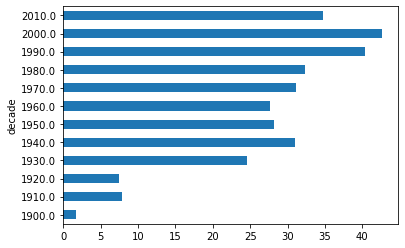

In [16]:
dec_dist.plot(kind='barh')

## Part 3: What is the gender of a typical Nobel Prize winner?

Add a `female_winner` column, where the value is `TRUE` when `Sex` is 'Female'

In [17]:
nobel['female_winner']= nobel.Sex== "Female"

In [18]:
nobel.female_winner.sum()

50

Calculate the percentage of female winners by decade and category.

In [19]:
Total_W_decade=nobel.groupby(['decade','Category']).Sex.count()
Total_W_decade

decade  Category  
1900.0  Chemistry      9
        Literature    10
        Medicine      12
        Peace         13
        Physics       13
                      ..
2010.0  Economics     16
        Literature     7
        Medicine      20
        Peace          7
        Physics       22
Name: Sex, Length: 66, dtype: int64

Plot the percentage of female winners by decade and category.

In [20]:
Total_female_decade=nobel.groupby(['decade','Category']).female_winner.sum()
Total_female_decade

decade  Category  
1900.0  Chemistry     0
        Literature    1
        Medicine      0
        Peace         1
        Physics       1
                     ..
2010.0  Economics     0
        Literature    2
        Medicine      2
        Peace         4
        Physics       0
Name: female_winner, Length: 66, dtype: int64

In [21]:
100*Total_female_decade/Total_W_decade

decade  Category  
1900.0  Chemistry      0.000000
        Literature    10.000000
        Medicine       0.000000
        Peace          7.692308
        Physics        7.692308
                        ...    
2010.0  Economics      0.000000
        Literature    28.571429
        Medicine      10.000000
        Peace         57.142857
        Physics        0.000000
Length: 66, dtype: float64

## Part 4: The first woman to win the Nobel Prize

Find the first woman to win a Nobel Prize.

In [22]:
nobel.loc[nobel[nobel.female_winner==1].Year.idxmin()]

Year                                                                 1903
Category                                                          Physics
Prize                                     The Nobel Prize in Physics 1903
Motivation              "in recognition of the extraordinary services ...
Prize_Share                                                           1/4
Laureate_ID                                                             6
Laureate_Type                                                  Individual
Full_Name                                     Marie Curie, née Sklodowska
Birth_Date                                                     1867-11-07
Birth_City                                                         Warsaw
Birth_Country                                     Russian Empire (Poland)
Sex                                                                Female
Organization_Name                                                     NaN
Organization_City                     

## Part 5: Repeat laureates

Use the `count` method to count the number of wins grouped by `Full Name`.

In [23]:
nobel.groupby('Full_Name').Year.count().sort_values(ascending=False)

Full_Name
Jack W. Szostak                                                                      3
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Marie Curie, née Sklodowska                                                          2
Johann Deisenhofer                                                                   2
Stefan W. Hell                                                                       2
                                                                                    ..
H. David Politzer                                                                    1
H. Robert Horvitz                                                                    1
Haldan Keffer Hartline                                                               1
Halldór Kiljan Laxness                                                               1
Élie Ducommun                                                                        1
Name: Year, Length: 904, dtype: i

## Part 6: How old are you when you get the prize?

Fix Albert John Lutuli and A. Michael Spence `Birth Date` values

In [24]:
nobel.loc[nobel.Full_Name=='Albert John Lutuli']

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,...,Sex,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country,usa_born_winner,decade,female_winner
342,1960,Peace,The Nobel Peace Prize 1960,NaN,1/1,519,Individual,Albert John Lutuli,1898-00-00,Bulawayo,...,Male,NaN,NaN,NaN,1967-07-21,Stanger,South Africa,False,1960.0,False


In [25]:
nobel.Birth_Date.replace(to_replace='1898-00-00',value='1898-01-01',inplace=True)

In [26]:
nobel.Birth_Date.replace(to_replace='1943-00-00',value='1943-01-01',inplace=True)

In [27]:
nobel.loc[nobel.Full_Name=='Albert John Lutuli']

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,...,Sex,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country,usa_born_winner,decade,female_winner
342,1960,Peace,The Nobel Peace Prize 1960,NaN,1/1,519,Individual,Albert John Lutuli,1898-01-01,Bulawayo,...,Male,NaN,NaN,NaN,1967-07-21,Stanger,South Africa,False,1960.0,False


In [28]:
nobel.loc[nobel.Full_Name=='A. Michael Spence']

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,...,Sex,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country,usa_born_winner,decade,female_winner
748,2001,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,745,Individual,A. Michael Spence,1943-01-01,"Montclair, NJ",...,Male,Stanford University,"Stanford, CA",United States of America,NaN,NaN,NaN,True,2000.0,False


Calculate how old people were when they got their price. Assign the resulting Series to the `nobel_age` column.

In [29]:
nobel.Year=pd.to_datetime(nobel.Year,format='%Y')

In [30]:
nobel.Birth_Date=pd.to_datetime(nobel.Birth_Date)

In [31]:
nobel.head()

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,...,Sex,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country,usa_born_winner,decade,female_winner
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900.0,False
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900.0,False
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900.0,False
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900.0,False
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900.0,False


In [32]:
nobel['nobel_age']=(nobel.Year-nobel.Birth_Date)

In [33]:
nobel.head()

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,...,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country,usa_born_winner,decade,female_winner,nobel_age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900.0,False,17655 days
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900.0,False,22571 days
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900.0,False,17093 days
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900.0,False,26535 days
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900.0,False,28715 days


In [34]:
nobel.nobel_age=nobel.nobel_age.dt.days

In [35]:
nobel.head()

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,...,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country,usa_born_winner,decade,female_winner,nobel_age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900.0,False,17655.0
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900.0,False,22571.0
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900.0,False,17093.0
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900.0,False,26535.0
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900.0,False,28715.0


In [36]:
nobel.loc[nobel.nobel_age.isna()==1]

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,...,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country,usa_born_winner,decade,female_winner,nobel_age
24,1904-01-01,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1900.0,False,NaN
61,1910-01-01,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1910.0,False,NaN
90,1917-01-01,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1910.0,False,NaN
206,1938-01-01,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1930.0,False,NaN
222,1944-01-01,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1940.0,False,NaN
244,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1940.0,False,NaN
245,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1940.0,False,NaN
295,1954-01-01,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1950.0,False,NaN
365,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1960.0,False,NaN
366,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1960.0,False,NaN


In [37]:
nobel.nobel_age.dropna(axis=0,how='any',inplace=True)

In [38]:
nobel.nobel_age=nobel.nobel_age/365

In [39]:
nobel.head()

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,...,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country,usa_born_winner,decade,female_winner,nobel_age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900.0,False,48.369863
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900.0,False,61.838356
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900.0,False,46.830137
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900.0,False,72.698630
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900.0,False,78.671233


Plot `nobel_age` as a function of `Year` as a scatter plot.

Text(0, 0.5, 'Age')

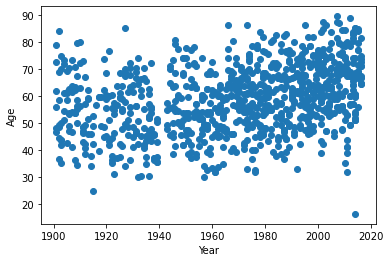

In [40]:
X=nobel.nobel_age
y=nobel.Year
plt.scatter(y,X)
plt.xlabel('Year')
plt.ylabel('Age')

## Part 6: Oldest and youngest winners

Find the oldest winner.

In [41]:
nobel.loc[nobel.nobel_age.idxmax()]

Year                                                  2007-01-01 00:00:00
Category                                                        Economics
Prize                   The Sveriges Riksbank Prize in Economic Scienc...
Motivation              "for having laid the foundations of mechanism ...
Prize_Share                                                           1/3
Laureate_ID                                                           820
Laureate_Type                                                  Individual
Full_Name                                                  Leonid Hurwicz
Birth_Date                                            1917-08-21 00:00:00
Birth_City                                                         Moscow
Birth_Country                                                      Russia
Sex                                                                  Male
Organization_Name                                 University of Minnesota
Organization_City                     

Find the youngest winner.

In [42]:
nobel.loc[nobel.nobel_age.idxmin()]

Year                                                  2014-01-01 00:00:00
Category                                                            Peace
Prize                                          The Nobel Peace Prize 2014
Motivation              "for their struggle against the suppression of...
Prize_Share                                                           1/2
Laureate_ID                                                           914
Laureate_Type                                                  Individual
Full_Name                                                Malala Yousafzai
Birth_Date                                            1997-07-12 00:00:00
Birth_City                                                        Mingora
Birth_Country                                                    Pakistan
Sex                                                                Female
Organization_Name                                                     NaN
Organization_City                     